## Task 2
Carlos Andres Daza Rachen
J4134C

In [2]:
# import the libraries
import matplotlib.pyplot as plt
import numpy as np
import math
import time
import random
from datetime import datetime
from time import perf_counter
from time import perf_counter_ns
from scipy.optimize import minimize, brute



In [3]:
def f1(x):
    return x**3

def f2(x):
    return abs(x-0.2)

def f3(x):
    return x * math.sin(1/x)

### Exhaustive search

In [25]:
def exhaustive(a, b, e, fx):
    n = (b-a)/e
    xk = []    

    # running search
    for k in range(int(n)):
        x = a + k * (b-a)/n
        xk.append(fx(x))
    
    min_index = np.argmin(xk)
   
    x_index = np.arange(a, b, e)

    print(f'Iterations = {n}')
    print(f'Calls = {n}')

    return x_index[min_index], xk[min_index]

### Dychotomy search

In [26]:
def dichotomy(a, b, e, fx, verbose=False):

    delta = random.uniform(0,e)

    # steps of each iteration
    steps = []
    steps.append(f'a = {a}, b = {b}, delta = {delta}')

    iter, f_iter = 0, 0
    
    while abs(a - b) > e:
        # find central
        x1 = (a + b - delta) / 2
        x2 = (a + b + delta) / 2

        # update a b
        if fx(x1) <= fx(x2):
            a, b = a, x2
        else:
            a, b = x1, b

        steps.append(f'a = {a:.5f}, b = {b:.5f}, x1 = {x1:.5f}, x2 = {x2:.5f}, delta = {delta:.5f}')
        iter += 1
        f_iter += 2

    if verbose:
        print('\n'.join(steps), end='\n\n')

    print(f'Iterations = {iter}')
    print(f'Calls = {f_iter}')
    print(f'Minimum at x = {a:.4f} with value {fx(a):.4f}', end='\n\n')

    return a, b, iter, f_iter

### Golden section

In [27]:
def golden(a, b, e, fx, verbose=False):

    # step logs
    steps = []

    iter = 0

    while abs(a - b) > e:
        # find central on first iteration
        if iter == 0:        
            x1 = a + (3 - math.sqrt(5)) / 2 * (b - a)
            x2 = b + (math.sqrt(5) - 3) / 2 * (b - a)

            steps.append(f'a = {a:.5f}, b = {b:.5f}, x1 = {x1:.5f}, x2 = {x2:.5f}')

            # f_iter += 1

        # update a b
        if fx(x1) <= fx(x2):
            a, b, x2 = a, x2, x1
            x1 = a + (3 - math.sqrt(5)) / 2 * (b - a)
        else:
            a, b, x1 = x1, b, x2
            x2 = b + (math.sqrt(5) - 3) / 2 * (b - a)

        steps.append(f'a = {a:.5f}, b = {b:.5f}, x1 = {x1:.5f}, x2 = {x2:.5f}')
        iter += 1
        # f_iter += 1

    if verbose:
        print('\n'.join(steps), end='\n\n')
    print(f'Iterations = {iter}')
    print(f'Calls = {len(steps)}')
    print(f'Minimum at x = {a:.4f} with value {fx(a):.4f}', end='\n\n')

    ##return a, b, iter, len(steps)


## X^3

In [28]:
print('Exhaustive Search')
x1_xmin, x1_fmin = exhaustive(0, 1, 0.001, f1)
print(f'Minimum at x = {x1_xmin} with value {x1_fmin}', end='\n\n')

print('Dichotomy Search')
dichotomy(0, 1, 0.001, f1, verbose=False)

print('Golden Section')
golden(0, 1, 0.001, f1, verbose=False)



Exhaustive Search
Iterations = 1000.0
Calls = 1000.0
Minimum at x = 0.0 with value 0.0

Dichotomy Search
Iterations = 13
Calls = 26
Minimum at x = 0.0000 with value 0.0000

Golden Section
Iterations = 15
Calls = 16
Minimum at x = 0.0000 with value 0.0000



## |x - 0.2| 


In [29]:
print('Exhaustive Search')
x1_xmin, x1_fmin = exhaustive(0, 1, 0.001, f2)
print(f'Minimum at x = {x1_xmin} with value {x1_fmin}', end='\n\n')

print('Dichotomy Search')
dichotomy(0, 1, 0.001, f2, verbose=False)

print('Golden Section')
golden(0, 1, 0.001, f2, verbose=False)

Exhaustive Search
Iterations = 1000.0
Calls = 1000.0
Minimum at x = 0.2 with value 0.0

Dichotomy Search
Iterations = 11
Calls = 22
Minimum at x = 0.1997 with value 0.0003

Golden Section
Iterations = 15
Calls = 16
Minimum at x = 0.1997 with value 0.0003



## $x\sin(1/x)$

In [30]:
print('Exhaustive Search')
x1_xmin, x1_fmin = exhaustive(0.001, 1, 0.001, f3)
print(f'Minimum at x = {x1_xmin} with value {x1_fmin}', end='\n\n')

print('Dichotomy Search')
dichotomy(0.001, 1, 0.001, f3, verbose=False)

print('Golden Section')
golden(0.001, 1, 0.001, f3, verbose=False)

Exhaustive Search
Iterations = 999.0
Calls = 999.0
Minimum at x = 0.223 with value -0.21722461258083445

Dichotomy Search
Iterations = 12
Calls = 24
Minimum at x = 0.0419 with value -0.0403

Golden Section
Iterations = 15
Calls = 16
Minimum at x = 0.2222 with value -0.2172



# Second point

In [4]:
def ab(seed=None):
    if seed != None:
        random.seed(seed)
    return random.random(), random.random()

def noisy(a, b):
    x = np.array([k/100 for k in range(100)])
    y = np.array([(a * xk + b + np.random.normal(0,1)) for xk in x])    
    return x, y
    
def linear_aprox(a, b, x):
    return a * x + b

def rational_aprox(a, b, x):
    return a / (1 + b * x)

def linear(init_point, *args):
    '''please pass x and y into *args'''
    a, b = init_point
    x, y = args[0], args[1]    
    return np.sum((linear_aprox(a,b,x) - y)**2)

def rational(init_point, *args):
    '''please pass x and y into *args'''
    a, b = init_point
    x, y = args[0], args[1]
    return np.sum((rational_aprox(a, b, x) - y)**2)
    

In [5]:
a, b = ab(24)
x, y = noisy(a, b)
yk = a * x + b
grid = (slice(a, b, 0.001), slice(a, b, 0.001))

## Linear function

In [6]:
print('Exhaustive Search')
exhaustive_linear = brute(linear, grid, args=(x, y), disp=True)
print(exhaustive_linear, end='\n\n')

print('Gauss (coordinate descent)')
gauss_linear = minimize(linear, [a, b], args=(x, y), method='Powell', tol=0.001, options={'disp': True})
print(gauss_linear['x'], end='\n\n')

print('Nelder-Mead')
nelder_linear = minimize(linear, [a, b], args=(x, y), method='nelder-mead', tol=0.001, options={'disp': True})
print(nelder_linear['x'], end='\n\n')

Exhaustive Search
Optimization terminated successfully.
         Current function value: 118.295906
         Iterations: 29
         Function evaluations: 55
[0.43816204 1.01024621]

Gauss (coordinate descent)
Optimization terminated successfully.
         Current function value: 118.296267
         Iterations: 3
         Function evaluations: 71
[0.43960209 1.01138111]

Nelder-Mead
Optimization terminated successfully.
         Current function value: 118.295907
         Iterations: 21
         Function evaluations: 41
[0.43838247 1.01002754]



## Rational function

In [7]:
print('Exhaustive Search')
exhaustive_r = brute(rational, grid, args=(x, y), disp=True)
print(exhaustive_r, end='\n\n')

print('Gauss (coordinate descent)')
gauss_r = minimize(rational, [a, b], args=(x, y), method='Powell', tol=0.001, options={'disp': True})
print(gauss_r['x'], end='\n\n')

print('Nelder-Mead')
nelder_r = minimize(rational, [a, b], args=(x, y), method='nelder-mead', tol=0.001, options={'disp': True})
print(nelder_r['x'], end='\n\n')

Exhaustive Search
Optimization terminated successfully.
         Current function value: 118.052691
         Iterations: 41
         Function evaluations: 81
[ 1.00984536 -0.3337274 ]

Gauss (coordinate descent)
Optimization terminated successfully.
         Current function value: 118.052691
         Iterations: 5
         Function evaluations: 121
[ 1.00983226 -0.33377371]

Nelder-Mead
Optimization terminated successfully.
         Current function value: 118.052695
         Iterations: 38
         Function evaluations: 75
[ 1.00955137 -0.33397519]



## Visualization

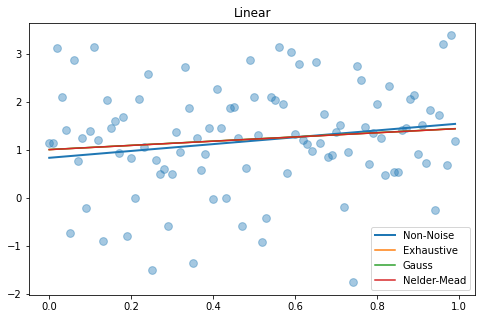

In [21]:
plt.figure(figsize=(8,5))
plt.title('Linear')
plt.scatter(x, y, alpha=0.4, s=60)
plt.plot(x, yk, linewidth=2, label='Non-Noise')
plt.plot(x, linear_aprox(exhaustive_linear[0], exhaustive_linear[1], x), label='Exhaustive')
plt.plot(x, linear_aprox(gauss_linear['x'][0], gauss_linear['x'][1], x), label='Gauss')
plt.plot(x, linear_aprox(nelder_linear['x'][0], nelder_linear['x'][1], x), label='Nelder-Mead')
plt.legend()
plt.show()

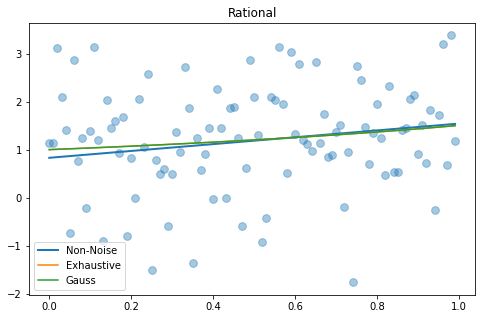

In [23]:

plt.figure(figsize=(8,5))
plt.title('Rational')
plt.scatter(x, y, alpha=0.4, s=60)
plt.plot(x, yk, linewidth=2, label='Non-Noise')
plt.plot(x, rational_aprox(exhaustive_r[0], exhaustive_r[1], x), label='Exhaustive')
plt.plot(x, rational_aprox(gauss_r['x'][0], gauss_r['x'][1], x), label='Gauss')
###plt.plot(x, rational_aprox(nelder_r['x'][0], nelder_r['x'][1], x), label='Nelder-Mead')
plt.legend()
plt.show()